In [584]:
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import math
import random


art = pd.read_csv('theArt.csv')
data = pd.read_excel('data_try2.xlsx')


In [585]:
## N-Number as random seed

n_number = "147235354"

# Convert the string N-number to an integer for seeding the RNG
seed_value = int(n_number)

# Seed the RNG with the integer seed value
random.seed(seed_value)


In [586]:
# Formating of 'data' dataframe

# Columns 1-91: 1-91
# Columns 92-182: 1-91
# Columns 183 - 194: 1-12
# Columns 195 - 205: 1 - 11
# Columns 206 - 215: 1 - 10
# Columns 216: age
# Columns 217: gender
# Columns 218: political_orientation
# Columns 219 art_education
# Columns 220: general_sophistication 
# Columns 221: an_artist_myself

# Add Column Labels for easier access



# assign column names based on the specified ranges

column_names = list(range(1,92)) + list(range(1,92)) + list(range(1,13)) + list(range(1,12)) + \
               list(range(1,11)) + ['age', 'gender', 'political_orientation', 'art_education', \
                                    'general_sophistication', 'an_artist_myself']
data.columns = column_names





## 1) Is classical art more well liked than modern art? 

We can make many statistical analysis to answer this question

- Central tendency differences
- Non-Parametric Test to compare if difference between rating of classical and modern art are statistically significant

In [587]:
# 1) Central tendency differences

classical = art[art['Source (1 = classical, 2 = modern, 3 = nonhuman)'] == 1]['Number '].tolist()
classical_data = data.iloc[:, classical]

modern = art[art['Source (1 = classical, 2 = modern, 3 = nonhuman)'] == 2]['Number '].tolist()
modern_data = data.iloc[:, modern]

mean_classical_art = classical_data.mean().mean()
median_classical_art = classical_data.median().median()

mean_modern_art = modern_data.mean().mean()
median_modern_art = modern_data.median().median()


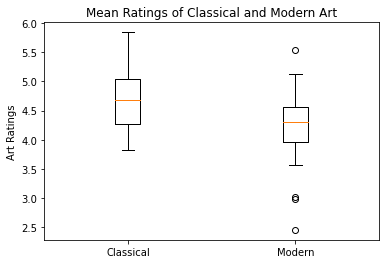

Mean Clasical art:  4.707142857142856
Median Clasical art:  5.0
Mean Modern art:  4.210380952380954
Median Modern art:  4.0


In [588]:
# Graph


data_ = [classical_data.mean(), modern_data.mean()]


labels = ['Classical', 'Modern']


fig, ax = plt.subplots()
ax.boxplot(data_, labels=labels)
ax.set_ylabel('Art Ratings')
ax.set_title('Mean Ratings of Classical and Modern Art')
plt.show()


print("Mean Clasical art: ", mean_classical_art)
print("Median Clasical art: ", median_classical_art)
print("Mean Modern art: ", mean_modern_art)
print("Median Modern art: ", median_modern_art)




In [589]:
# Check if results are significant


modern_ratings = modern_data.values.flatten().tolist()
classical_ratings = classical_data.values.flatten().tolist()


stat, p_value = mannwhitneyu(classical_ratings, modern_ratings , alternative='greater')

if p_value < 0.05:
    print("The ratings for classical art are significantly higher than those for modern art.")
else:
    print("There is no statistically significant difference in ratings between classical and modern art.")

The ratings for classical art are significantly higher than those for modern art.


We understand that the central tendency measures of classical artwork are higher than those of modern art. Then we conducted a statistical test to understand if this difference is statistaclly significant and the result rejected the null hypothesis. For this reason we can claim that there is statistically significant evidence based on these samples that classical art is more well liked than modern art.

## 2)  Is there a difference in the preference ratings for modern art vs. non-human (animals and computers) generated art? 

- Perform a 'two-sided' Mann-Whitney U test to show if there is significant difference between ratings


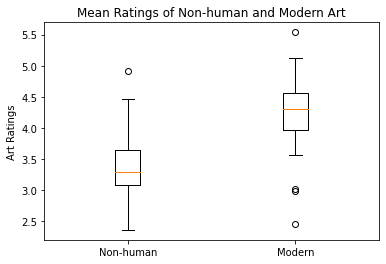

Non-human Rating Mean:  3.375238095238095
Modern Art Rating Mean:  4.210380952380954
Non-human Rating Median:  3.0
Modern Art Rating Median:  4.0


In [590]:
non_human = art[art['Source (1 = classical, 2 = modern, 3 = nonhuman)'] == 3]['Number '].tolist()
non_human_data = data.iloc[:, non_human]

modern = art[art['Source (1 = classical, 2 = modern, 3 = nonhuman)'] == 2]['Number '].tolist()
modern_data = data.iloc[:, modern]

data_ = [non_human_data.mean(), modern_data.mean()]

labels = ['Non-human', 'Modern']

fig, ax = plt.subplots()
ax.boxplot(data_, labels=labels)
ax.set_ylabel('Art Ratings')
ax.set_title('Mean Ratings of Non-human and Modern Art')
plt.show()

#Central Tendemcy

print("Non-human Rating Mean: ", non_human_data.mean().mean())
print("Modern Art Rating Mean: ", modern_data.mean().mean())

print("Non-human Rating Median: ", non_human_data.median().median())
print("Modern Art Rating Median: ", modern_data.median().median())

In [591]:
# Check if results are significant


modern_ratings = modern_data.values.flatten().tolist()
non_human_data_ratings = non_human_data.values.flatten().tolist()


stat, p_value = mannwhitneyu(non_human_data_ratings, modern_ratings, alternative='two-sided')

if p_value < 0.05:
    print("The difference in ratings between non-human and modern art is statistically significant.")
else:
    print("There is no statistically significant difference in ratings between non-human and modern art.")

The difference in ratings between non-human and modern art is statistically significant.


We observe the difference between central tendencies of 'non_human' vs 'modern' artwork ratings. Then we perform a 'two-sided' Mann-Whitney U test to conclude that the difference in ratings between non-human and modern art is statistically significant based on this dataset.

## 3) Do women give higher art preference ratings than men? 

- Find central tendency differences between ratings by 'women' compared to ratings by "men"
- Identify if this difference is statistically significant

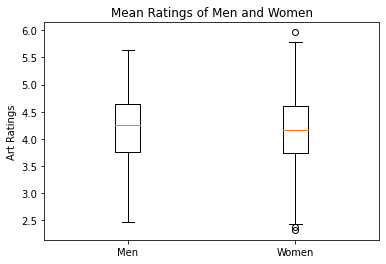

Men Rating Mean:  4.17912087912088
Women Rating Mean:  4.147852147852149
Men Rating Median:  4.0
Women Rating Median:  4.0


In [592]:
# Central Tendency measuerements

men_df = data[data['gender'] == 1]
women_df = data[data['gender'] == 2]

men_df = men_df[:91].dropna()
women_df = women_df[:91].dropna()

men_df = men_df.iloc[:, :91]
women_df = women_df.iloc[:, :91]

women_ratings = women_df.values.flatten().tolist()
men_ratings = men_df.values.flatten().tolist()

data_ = [men_df[:91].mean(), women_df[:91].mean()]


labels = ['Men', 'Women']

fig, ax = plt.subplots()
ax.boxplot(data_, labels=labels)
ax.set_ylabel('Art Ratings')
ax.set_title('Mean Ratings of Men and Women')
plt.show()


# Central Tendency

print("Men Rating Mean: ", men_df[:91].mean().mean())
print("Women Rating Mean: ", women_df[:91].mean().mean())

print("Men Rating Median: ", men_df[:91].median().median())
print("Women Rating Median: ", women_df[:91].median().median())


In [593]:

stat, p_value = stats.ttest_ind(women_ratings, men_ratings, equal_var=False)

if p_value / 2 < 0.05:
    if t_stat < 0:
        print("Women rate significantly higher than men.")
    else:
        print("Men rate significantly higher than women.")
else:
    print("There is no significant difference in ratings between men and women.")

There is no significant difference in ratings between men and women.


We understood the difference of central tendencies of "Men" ratings vs "Women" ratings and learned their means were different but medians were equal. We then tested to see if this result was statistically significant using a ilcoxon-Mann-Whitney  test to understand the difference we found in their mean and determined the ratings by women are not significanlty higher than men according to this dataset.

## 4) Is there a difference in the preference ratings of users with some art background (some art education) vs. none? 

- Compare central tendency measures of ratings between people who have had some "art education" vs those who haven't

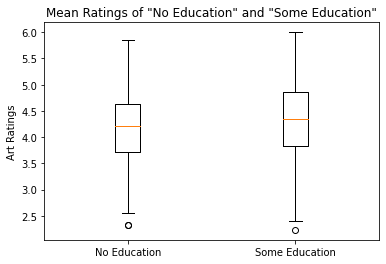

Some Education Mean:  4.142615626132109
No Education Mean:  4.294529646177998
Some Education Median:  4.0
No Education Median:  4.0


In [594]:
some_education = data[data['art_education'] > 0][:91]
no_education = data[data['art_education'] == 0][:91]

no_education = no_education.iloc[:, :91]
some_education = some_education.iloc[:, :91]

data_ = [some_education[:91].mean(), no_education[:91].mean()]

labels = ['No Education', 'Some Education']

fig, ax = plt.subplots()
ax.boxplot(data_, labels=labels)
ax.set_ylabel('Art Ratings')
ax.set_title('Mean Ratings of "No Education" and "Some Education"')
plt.show()


# Central Tendency

print("Some Education Mean: ", some_education[:91].mean().mean())
print("No Education Mean: ", no_education[:91].mean().mean())

print("Some Education Median: ", some_education[:91].median().median())
print("No Education Median: ", no_education[:91].median().median())


In [595]:
no_education = no_education[:91].dropna()
some_education = some_education[:91].dropna()

no_education = no_education.iloc[:, :91]
some_education = some_education.iloc[:, :91]

some_education_ratings = some_education[:91].values.flatten().tolist()
no_education_ratings = no_education[:91].values.flatten().tolist()


t_stat, p_val = stats.ttest_ind(some_education_ratings, no_education_ratings, equal_var=False)

if p_val < 0.05:
    print("The ratings by 'some_education_ratings' are significantly different than 'no_education_ratings'.")
else:
    print("The ratings by 'some_education_ratings' are not significantly different than 'no_education_ratings'.")


The ratings by 'some_education_ratings' are significantly different than 'no_education_ratings'.


## 5) Build a regression model to predict art preference ratings from energy ratings only. Make sure to use cross-validation methods to avoid overfitting and characterize how well your model predicts art preference ratings

- Perform EDA: Find coorelation betweeen energy ratings and art preference ratings, outliers and distribution of ratings
- Build regression model to predict art preference ratings from energy ratings only
- Analyze findings

In [596]:
energy = data.iloc[:, 91:182]
ratings = data.iloc[:, :91]

corr_coef, p_value = pearsonr(energy.values.flatten(), ratings.values.flatten())
print("Pearson correlation coefficient: {:.4f}".format(corr_coef))
spearman_coef, _ = spearmanr(pref_ene['avg_energy_ratings'], pref_ene['avg_preference_ratings'])
print('Spearman coefficient: {:.4f}'.format(spearman_coef))



Pearson correlation coefficient: -0.0156
Spearman coefficient: 0.1681


In [597]:
energy = data.iloc[:, 91:182]
ratings = data.iloc[:, :91]

pref_ene = pd.DataFrame({
    'avg_preference_ratings': ratings.mean(axis=1),
    'avg_energy_ratings': energy.mean(axis=1)
})

X_train, X_test, y_train, y_test = train_test_split(pref_ene['avg_energy_ratings'].values.reshape(-1, 1), pref_ene['avg_preference_ratings'].values.reshape(-1, 1), test_size=0.4, random_state=seed_value)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

r_squared = model.score(X_test, y_test)
print('R^2', r_squared)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))



R^2 -0.0468221954358079
Root Mean Squared Error (RMSE): 0.5624


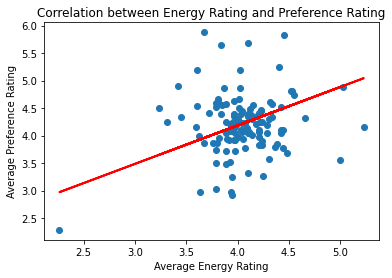

In [598]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Average Energy Rating')
plt.ylabel('Average Preference Rating')
plt.title('Correlation between Energy Rating and Preference Rating')
plt.show()


## 6) Build a regression model to predict art preference ratings from energy ratings and demographic information. Make sure to use cross-validation methods to avoid overfitting and comment on how well your model predicts relative to the “energy ratings only” model. 

- 1) Normalize data
- 2) Conduct coorleation tests to first understand possible relationships between demographics and energy ratings, this could be helpful to reduce confounders
- 3) Conduct coorelation test to understand relationship between demographics and raitngs considering what we found in the prevoious tests
- 3) Conduct multivariable regression to predict ratings from energy ratings as well as demographics

In [599]:
demo = data.iloc[:, 215:217]
energy = data.iloc[:, 91:182]
ratings = data.iloc[:, :91]

In [600]:
demo_en_pr = pd.DataFrame({
    'avg_preference_ratings': ratings.mean(axis=1),
    'avg_energy_ratings': energy.mean(axis=1),
    'age': demo_en_pr['age'],
    'gender': demo_en_pr['gender'],
})


In [601]:
demo_en_pr.corr()

,avg_preference_ratings,avg_energy_ratings,age,gender
avg_preference_ratings,1.000000,0.320264,-0.108275,0.040645
avg_energy_ratings,0.320264,1.000000,0.156726,0.017537
age,-0.108275,0.156726,1.000000,-0.122822
gender,0.040645,0.017537,-0.122822,1.000000


In [602]:
# Regression

demo_en_pr = demo_en_pr.dropna()

X_train, X_test, y_train, y_test = train_test_split(demo_en_pr.drop('avg_preference_ratings', axis=1), 
                                                    demo_en_pr['avg_preference_ratings'], 
                                                    test_size=0.3, 
                                                    random_state= seed_value)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


r2 = r2_score(y_test, y_pred)
print('R^2:', r2)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

R^2: 0.20508343516610827
RMSE: 0.6247885167384617


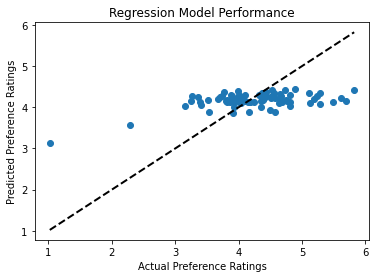

In [603]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Preference Ratings')
plt.ylabel('Predicted Preference Ratings')
plt.title('Regression Model Performance')
plt.show()


## 7) Considering the 2D space of average preference ratings vs. average energy rating (that contains the 91 art pieces as elements), how many clusters can you – algorithmically - identify in this space? Make sure to comment on the identity of the clusters – do they correspond to particular types of art?

- I will use both the elbow method to indetify the number of clusters to use in the K-means algorithm. 
- After Identifying the optimal number of clusters for my algorithm I will perform a k-means classification to distinguish both clusters and make inferences on how they are different

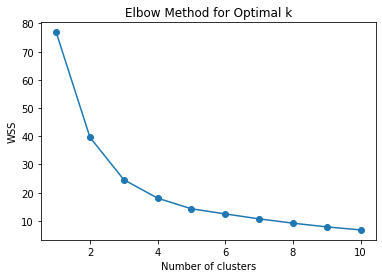

In [604]:
preference_cols = data.iloc[:, 0:91]
energy_cols = data.iloc[:, 91:182]

avg_preference = preference_cols.mean(axis=0)
avg_energy = energy_cols.mean(axis=0)

art_data = pd.concat([avg_preference, avg_energy], axis=1)
art_data.columns = ['Preference', 'Energy']
X = art_data[['Preference', 'Energy']]

range_n_clusters = range(2, 10)

# Elbow Method
distortions = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state= seed_value)
    cluster_labels = clusterer.fit_predict(X)
    distortion = clusterer.inertia_
    distortions.append(distortion)


wss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=seed_value )
    kmeans.fit(art_data)
    wss.append(kmeans.inertia_)

# Plot for elbow method
plt.plot(range(1, 11), wss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.title('Elbow Method for Optimal k')
plt.show()

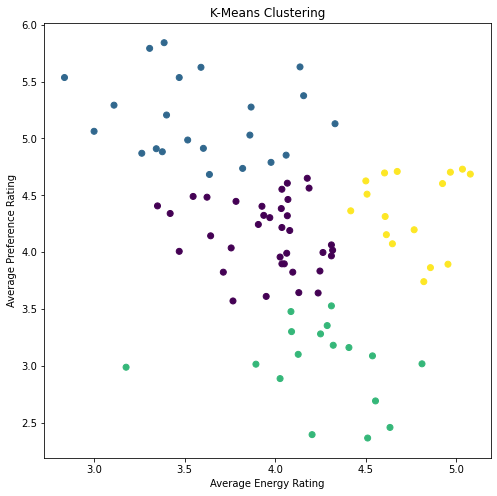

In [605]:
kmeans = KMeans(n_clusters=4, random_state = random_seed)

kmeans.fit(art_data[['Energy', 'Preference']])

labels = kmeans.labels_

art_data['cluster'] = labels


plt.figure(figsize=(8, 8))
plt.scatter(art_data['Energy'], art_data['Preference'], c=art_data['cluster'])
plt.xlabel('Average Energy Rating')
plt.ylabel('Average Preference Rating')
plt.title('K-Means Clustering')
plt.show()


In [606]:
cluster0 = art_data[art_data['cluster'] == 0]
cluster1 = art_data[art_data['cluster'] == 1]
cluster2 = art_data[art_data['cluster'] == 2]
cluster3 = art_data[art_data['cluster'] == 3]

cluster0_mean = cluster0[['Energy', 'Preference']].mean()
cluster1_mean = cluster1[['Energy', 'Preference']].mean()
cluster2_mean = cluster2[['Energy', 'Preference']].mean()
cluster3_mean = cluster3[['Energy', 'Preference']].mean()

print("Mean energy and preference ratings for each cluster:")
print()
print()
print("Cluster 0:", cluster0_mean)
print()
print()
print("Cluster 1:", cluster1_mean)
print()
print()
print("Cluster 2:", cluster2_mean)
print()
print()
print("Cluster 3:", cluster3_mean)


Mean energy and preference ratings for each cluster:


Cluster 0: Energy        3.961204
Preference    4.147222
dtype: float64


Cluster 1: Energy        3.593030
Preference    5.180455
dtype: float64


Cluster 2: Energy        4.248235
Preference    3.015882
dtype: float64


Cluster 3: Energy        4.747708
Preference    4.366458
dtype: float64


- Here we understand there are 4 clusters representing, high energy high preference, low energy low preference, low energy high preference, high energy high preference
- Based on these differences we analyze which artworks are associated to each cluster to see if there is ant relationship between art types and cluster

In [607]:
art_data.reset_index(inplace=True)
art_data.rename(columns={'index': 'artwork_id'}, inplace=True)

In [608]:
cluster_0 = art_data[art_data['cluster'] == 0][['artwork_id', 'Energy', 'Preference', 'cluster']]
cluster_1 = art_data[art_data['cluster'] == 1][['artwork_id', 'Energy', 'Preference', 'cluster']]
cluster_2 = art_data[art_data['cluster'] == 2][['artwork_id', 'Energy', 'Preference', 'cluster']]
cluster_3 = art_data[art_data['cluster'] == 3][['artwork_id', 'Energy', 'Preference', 'cluster']]

In [609]:
cluster_0 = cluster_0.merge(art[['Number ','Year' ,'Style', 'Source (1 = classical, 2 = modern, 3 = nonhuman)']], left_on='artwork_id', right_on='Number ')
cluster_1 = cluster_1.merge(art[['Number ', 'Year' , 'Style', 'Source (1 = classical, 2 = modern, 3 = nonhuman)']], left_on='artwork_id', right_on='Number ')
cluster_2 = cluster_2.merge(art[['Number ', 'Year' , 'Style', 'Source (1 = classical, 2 = modern, 3 = nonhuman)']], left_on='artwork_id', right_on='Number ')
cluster_3 = cluster_3.merge(art[['Number ', 'Year' , 'Style','Source (1 = classical, 2 = modern, 3 = nonhuman)']], left_on='artwork_id', right_on='Number ')

cluster_0.drop(columns=['Number '], inplace=True)
cluster_1.drop(columns=['Number '], inplace=True)
cluster_2.drop(columns=['Number '], inplace=True)
cluster_3.drop(columns=['Number '], inplace=True)


In [610]:
cluster_0['Century'] = cluster_0['Year'].apply(lambda x: round(x, -2) // 100)
cluster_1['Century'] = cluster_1['Year'].apply(lambda x: round(x, -2) // 100)
cluster_2['Century'] = cluster_2['Year'].apply(lambda x: round(x, -2) // 100)
cluster_3['Century'] = cluster_3['Year'].apply(lambda x: round(x, -2) // 100)


print('Cluster 0 (Medium Energy Medium Preference): Modal Decade of artworks in this cluster: ', cluster_0['Century'].mode()[0])
print('Cluster 1 (Low Energy High Preference): Modal Decade of artworks in this cluster: ', cluster_1['Century'].mode()[0])
print('Cluster 2 (High Energy Low Preference): Modal Decade of artworks in this cluster: ', cluster_2['Century'].mode()[0])
print('Cluster 3 (High Energy High Preference): Modal Decade of artworks in this cluster:', cluster_3['Century'].mode()[0])


Cluster 0 (Medium Energy Medium Preference): Modal Decade of artworks in this cluster:  20
Cluster 1 (Low Energy High Preference): Modal Decade of artworks in this cluster:  18
Cluster 2 (High Energy Low Preference): Modal Decade of artworks in this cluster:  20
Cluster 3 (High Energy High Preference): Modal Decade of artworks in this cluster: 19


- Best central tendency measure in this case is the mode because it provided the best insight at the most common time frames where artworks in each cluster were made. The mean is sensitive to outliers which can be very common in this specific analysis of years. Converted the analysis to every 100 years because our data is not large enough for the mode of specific years to provide considerable insight, I arbitrarily chose 100 years as range for artworks.

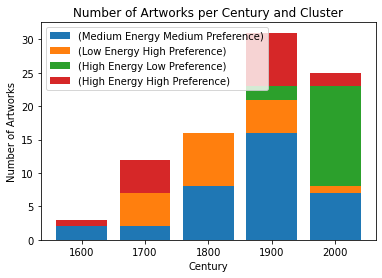

In [611]:
cluster_0_year = cluster_0['Year']
cluster_1_year = cluster_1['Year']
cluster_2_year = cluster_2['Year']
cluster_3_year = cluster_3['Year']

centuries = range(1600, 2100, 100)

num_artworks = {
    'Cluster 0': [((cluster_0_year >= century) & (cluster_0_year < century+100)).sum() for century in centuries],
    'Cluster 1': [((cluster_1_year >= century) & (cluster_1_year < century+100)).sum() for century in centuries],
    'Cluster 2': [((cluster_2_year >= century) & (cluster_2_year < century+100)).sum() for century in centuries],
    'Cluster 3': [((cluster_3_year >= century) & (cluster_3_year < century+100)).sum() for century in centuries]
}

fig, ax = plt.subplots()
ax.bar(centuries, num_artworks['Cluster 0'], width=80, label='(Medium Energy Medium Preference)')
ax.bar(centuries, num_artworks['Cluster 1'], width=80, bottom=num_artworks['Cluster 0'], label='(Low Energy High Preference)')
ax.bar(centuries, num_artworks['Cluster 2'], width=80, bottom=[sum(x) for x in zip(num_artworks['Cluster 0'], num_artworks['Cluster 1'])], label='(High Energy Low Preference)')
ax.bar(centuries, num_artworks['Cluster 3'], width=80, bottom=[sum(x) for x in zip(num_artworks['Cluster 0'], num_artworks['Cluster 1'], num_artworks['Cluster 2'])], label='(High Energy High Preference)')
ax.set_xlabel('Century')
ax.set_ylabel('Number of Artworks')
ax.set_title('Number of Artworks per Century and Cluster')
ax.legend()
plt.show()



## 8) Considering only the first principal component of the self-image ratings as inputs to a regression model – how well can you predict art preference ratings from that factor alone?

- 1) Identify "self_image" ratings
- 2) Perform PCA of this inputs
- 3) Create Screeplot
- 4) Understand what is the first principal component and isolate this data to become useful for analisis
- 5) Perform regression from only that factor
- 6) Analyze regression results

In [612]:
df = data.iloc[:, :91].join(data.iloc[:, 205:214], rsuffix='_self_image')
df = df.dropna()

In [613]:


self_image = df.iloc[:, 91: 100]
pca = PCA(n_components=1)
self_image_pca = pca.fit_transform(self_image)



In [614]:

preference = df.iloc[:, 0: 91]


In [615]:
regression_df = pd.DataFrame({
    'avg_preference_ratings': preference.mean(axis=1),
    'self_image_pca': self_image_pca.flatten()
})


corr_matrix = regression_df.corr()

print(corr_matrix.iloc[0, 1])

-0.041402589021116154


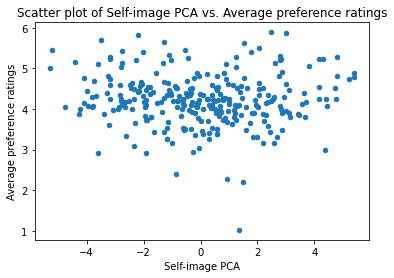

In [616]:

regression_df.plot(kind='scatter', x='self_image_pca', y='avg_preference_ratings')
plt.xlabel('Self-image PCA')
plt.ylabel('Average preference ratings')
plt.title('Scatter plot of Self-image PCA vs. Average preference ratings')
plt.show()

In [617]:
X = regression_df[['self_image_pca']]
y = regression_df['avg_preference_ratings']

model = LinearRegression().fit(X, y)

y_pred = model.predict(X)

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y, y_pred, squared=False)

print("RMSE: {:.4f}".format(rmse))

r_squared = model.score(X, y)

print("R^2: {:.4f}".format(r_squared))


RMSE: 0.6361
R^2: 0.0017


## 9) Consider the first 3 principal components of the “dark personality” traits – use these as inputs to a regression model to predict art preference ratings. Which of these components significantly predict art preference ratings? Comment on the likely identity of these factors (e.g. narcissism, manipulativeness, callousness, etc.).

In [618]:
data = pd.read_excel('data_try2.xlsx')
df = data.iloc[:, :91].join(data.iloc[:, 182:195], rsuffix='_dark_traits')
df = df.dropna()

In [619]:

dark_traits = df.iloc[:, 91 : 102]
pca = PCA(n_components=3)
dark_traits_pca = pca.fit_transform(dark_traits)

In [620]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=df.columns[91:102])
print(loadings_df)

                   PC1       PC2       PC3
Unnamed: 182  0.911561 -0.092412  0.336739
Unnamed: 183  0.645093 -0.161394 -0.118023
Unnamed: 184  0.535857 -0.530849  0.112578
Unnamed: 185  0.800254  0.130031  0.327817
Unnamed: 186  0.649545  0.625378  0.145914
Unnamed: 187  0.660475  0.509310  0.267037
Unnamed: 188  0.714159  0.381098 -0.315075
Unnamed: 189  0.569051  0.098355 -1.056326
Unnamed: 190  0.319588 -0.466827 -0.126559
Unnamed: 191  0.390604 -0.573567 -0.014986
Unnamed: 192  0.613349 -0.535987  0.077907


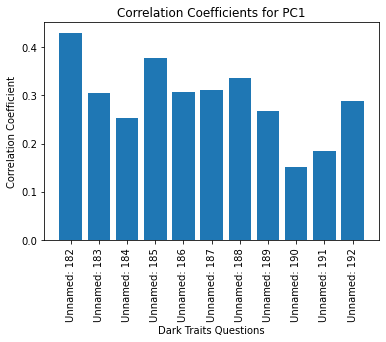

In [621]:
#PC 1: Loadings analisis

# Get the correlation coefficients between variables and PC1
pc1_loadings = pca.components_[0]

# Create a bar plot to show the correlations for PC1
plt.bar(range(len(pc1_loadings)), pc1_loadings)
plt.xticks(range(len(pc1_loadings)), dark_traits.columns, rotation=90)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Dark Traits Questions')
plt.title('Correlation Coefficients for PC1')
plt.show()



PC 1:
- Questions with most influence on PC 1: 1: 'I tend to manipulate others to get my way', 4: 'I tend to exploit others towards my own end'

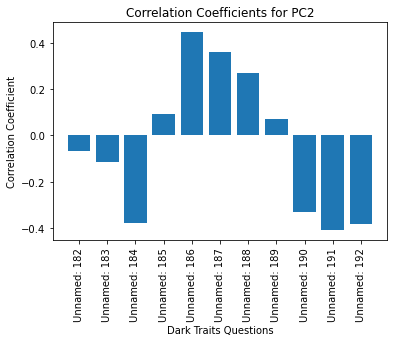

In [622]:
# PC 2: Loadings analisis

# Get the correlation coefficients between variables and PC1
pc2_loadings = pca.components_[1]

# Create a bar plot to show the correlations for PC1
plt.bar(range(len(pc1_loadings)), pc2_loadings)
plt.xticks(range(len(pc1_loadings)), dark_traits.columns, rotation=90)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Dark Traits Questions')
plt.title('Correlation Coefficients for PC2')
plt.show()


PC 2:
- Questions with most influence on PC 2: 3: 'I have used flattery to get my way', 5: 'I tend to lack remorse', 10: ' I tend to want others to pay attention to me'

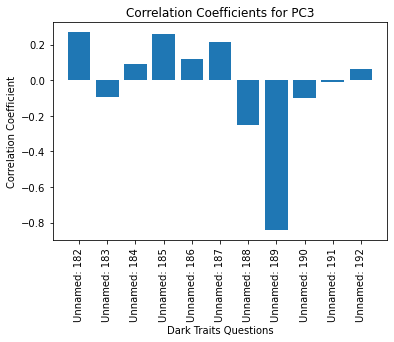

In [623]:
# PC 3: Loadings analisis

# Get the correlation coefficients between variables and PC3
pc3_loadings = pca.components_[2]

# Create a bar plot to show the correlations for PC3
plt.bar(range(len(pc1_loadings)), pc3_loadings)
plt.xticks(range(len(pc1_loadings)), dark_traits.columns, rotation=90)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Dark Traits Questions')
plt.title('Correlation Coefficients for PC3')
plt.show()

PC 3:
- Questions with most influence on PC 3: 8: 'I tend to be cynical'

In [624]:
dark_traits_pca_df = pd.DataFrame(dark_traits_pca, columns=['PCA1', 'PCA2', 'PCA3'])

new_df = pd.concat([data.iloc[:, :91], dark_traits_pca_df], axis=1)

new_df.columns = list(range(1, 92)) + ['PC1', 'PC2', 'PC3']

In [625]:
dark_traits_pca_df.columns = ['PC1', 'PC2', 'PC3']

df_concat = pd.concat([dark_traits_pca_df, df.iloc[:, :91]], axis=1)

df_concat.rename(columns=dict(zip(df_concat.columns[3:], range(1,92))), inplace=True)

df_concat = df_concat.dropna()

df_concat.columns = df_concat.columns[:3].tolist() + ['Artwork:'+str(col) for col in df_concat.columns[3:]]



In [626]:
preference_pc = df_concat.iloc[:, 3: 91]

In [627]:
regression_df = pd.DataFrame({
    'avg_preference_ratings': preference_pc.mean(axis=1),
    'dark_pca1': df_concat['PC1'],
    'dark_pca2': df_concat['PC2'],
    'dark_pca3': df_concat['PC3']
})

regression_df.corr()

,avg_preference_ratings,dark_pca1,dark_pca2,dark_pca3
avg_preference_ratings,1.000000,-0.032880,-0.038361,-0.050866
dark_pca1,-0.032880,1.000000,0.027226,0.000077
dark_pca2,-0.038361,0.027226,1.000000,0.040767
dark_pca3,-0.050866,0.000077,0.040767,1.000000


In [628]:

X = regression_df[['dark_pca1', 'dark_pca2', 'dark_pca3']]

y = regression_df['avg_preference_ratings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= seed_value)

model = LinearRegression().fit(X_train, y_train)

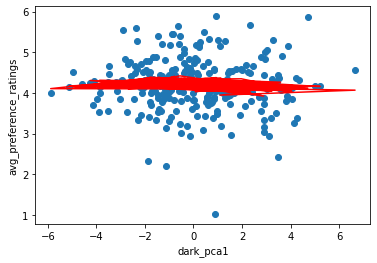

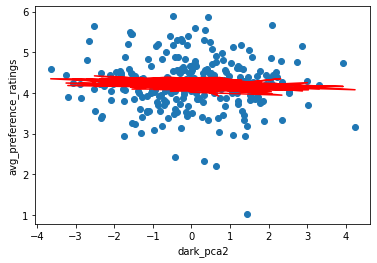

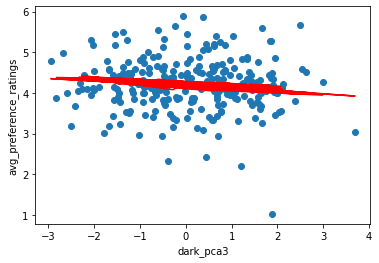

R-squared for dark_pca1: 0.004923759431549546
RMSE for dark_pca1: 0.6324553743470674
R-squared for dark_pca2: 0.00419778693945716
RMSE for dark_pca2: 0.6326860408387585
R-squared for dark_pca3: 0.003129521774344779
RMSE for dark_pca3: 0.6330253126747974
R-squared for all predictors combined: 0.004923759431549546
RMSE for all predictors combined: 0.6324553743470674


/Users/joaquinnavarrete/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/joaquinnavarrete/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/joaquinnavarrete/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/joaquinnavarrete/opt/anaconda3/lib/python3

In [629]:
plt.scatter(X['dark_pca1'], y)
plt.plot(X['dark_pca1'], model.predict(X), color='red')
plt.xlabel('dark_pca1')
plt.ylabel('avg_preference_ratings')
plt.show()


plt.scatter(X['dark_pca2'], y)
plt.plot(X['dark_pca2'], model.predict(X), color='red')
plt.xlabel('dark_pca2')
plt.ylabel('avg_preference_ratings')
plt.show()


plt.scatter(X['dark_pca3'], y)
plt.plot(X['dark_pca3'], model.predict(X), color='red')
plt.xlabel('dark_pca3')
plt.ylabel('avg_preference_ratings')
plt.show()



model = LinearRegression().fit(X, y)

print('R-squared for dark_pca1:', model.score(X[['dark_pca1', 'dark_pca2', 'dark_pca3']], y))
rmse1 = math.sqrt(mean_squared_error(y, model.predict(X[['dark_pca1', 'dark_pca2', 'dark_pca3']])))
print('RMSE for dark_pca1:', rmse1)


print('R-squared for dark_pca2:', model.score(X[['dark_pca2', 'dark_pca1', 'dark_pca3']], y))
rmse2 = math.sqrt(mean_squared_error(y, model.predict(X[['dark_pca2', 'dark_pca1', 'dark_pca3']])))
print('RMSE for dark_pca2:', rmse2)



print('R-squared for dark_pca3:', model.score(X[['dark_pca3', 'dark_pca1', 'dark_pca2']], y))
rmse3 = math.sqrt(mean_squared_error(y, model.predict(X[['dark_pca3', 'dark_pca1', 'dark_pca2']])))
print('RMSE for dark_pca3:', rmse3)



print('R-squared for all predictors combined:', model.score(X, y))
rmse_all = math.sqrt(mean_squared_error(y, model.predict(X)))
print('RMSE for all predictors combined:', rmse_all)


## 10) Can you determine the political orientation of the users (to simplify things and avoid gross class imbalance issues, you can consider just 2 classes: “left” (progressive & liberal) vs. “nonleft” (everyone else)) from all the other information available, using any classification model of your choice? Make sure to comment on the classification quality of this model. 

In [630]:
data = pd.read_excel('data_try2.xlsx')
column_names = list(range(1,92)) + list(range(1,92)) + list(range(1,13)) + list(range(1,12)) + \
               list(range(1,11)) + ['age', 'gender', 'political_orientation', 'art_education', \
                                    'general_sophistication', 'an_artist_myself']
data.columns = column_names

In [631]:

# PCA of Action

action_traits = data.iloc[:, 194 : 205].dropna()
pca = PCA(n_components=3)
action_traits_pca = pca.fit_transform(action_traits)

# PCA of Dark

dark_traits = data.iloc[:, 182 : 194].dropna()
pca = PCA(n_components=3)
dark_traits_pca = pca.fit_transform(dark_traits)

# PCA of Self Image

self_image = data.iloc[:, 205: 215].dropna()
pca = PCA(n_components=3)
self_image_pca = pca.fit_transform(self_image)


# Energy 

energy = data.iloc[:, 91:182]

# Ratings

ratings = data.iloc[:, :91]

# Other

other = data.iloc[:, 215:221]

# Concat Predictor dataframe

regression_df = pd.concat([pd.DataFrame(action_traits_pca), pd.DataFrame(dark_traits_pca), pd.DataFrame(self_image_pca), energy, ratings, other], axis=1)

In [632]:
regression_df['left_right'] = data['political_orientation'].apply(lambda x: 'left' if (x == 1 or x == 2) else 'non_left')

scaler = StandardScaler()

normalized_df = scaler.fit_transform(regression_df.drop('left_right', axis=1))

normalized_df = pd.DataFrame(normalized_df, columns=regression_df.drop('left_right', axis=1).columns)
normalized_df['left_right'] = regression_df['left_right']
regression_df = normalized_df
logistic_df = regression_df.dropna()


/Users/joaquinnavarrete/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/joaquinnavarrete/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [633]:

X_train, X_test, y_train, y_test = train_test_split(logistic_df.drop('left_right', axis=1), logistic_df['left_right'], test_size=0.3, random_state= seed_value)

model = LogisticRegression(random_state = seed_value)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.8375


/Users/joaquinnavarrete/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/joaquinnavarrete/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/joaquinnavarrete/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [634]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)
print('Sensitivity:', sensitivity)

specificity = tn / (tn + fp)
print('Specificity:', specificity)


Sensitivity: 0.7647058823529411
Specificity: 0.8913043478260869


/Users/joaquinnavarrete/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


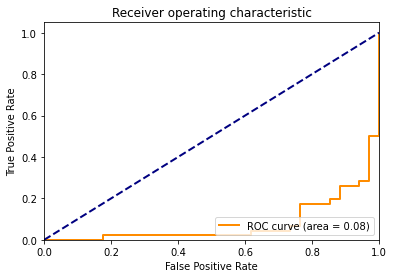

In [635]:
from sklearn.metrics import roc_curve, auc

y_test_binary = np.where(y_test == 'left', 1, 0)

y_pred_proba = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)

roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
